In [86]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
import csv
import geopy.distance

In [2]:
data =pd.read_csv('checkins.dat', sep='|',
                 skipinitialspace = True)
data.dropna(inplace = True)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
12,984483,1030290.0,955969.0,32.221743,-110.926479,2012-04-21 17:58:54
13,984685,304253.0,23558.0,40.650000,-73.950000,2012-04-21 18:19:34
14,984470,720850.0,749715.0,33.448377,-112.074037,2012-04-21 17:02:47
16,984610,1639666.0,442605.0,33.414768,-111.909309,2012-04-21 18:04:58
19,984653,1647192.0,23558.0,42.358431,-71.059773,2012-04-21 18:23:22


In [4]:
clf = MeanShift(bandwidth = 0.1)

In [6]:
data_train = data[:100000]
data_train

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
12,984483,1030290.0,955969.0,32.221743,-110.926479,2012-04-21 17:58:54
13,984685,304253.0,23558.0,40.650000,-73.950000,2012-04-21 18:19:34
14,984470,720850.0,749715.0,33.448377,-112.074037,2012-04-21 17:02:47
16,984610,1639666.0,442605.0,33.414768,-111.909309,2012-04-21 18:04:58
19,984653,1647192.0,23558.0,42.358431,-71.059773,2012-04-21 18:23:22


In [7]:
data_train = data_train.rename(index=str, columns={"id    ": "id", 
                                                   "user_id ": "user_id",
                                                  "venue_id ": "venue_id",
                                                  "latitude      ": "latitude",
                                                  "longitude     ": "longitude",
                                                  "created_at      ": "created_at"})

In [8]:
data_train = data_train.drop(['created_at'], axis = 1)

In [9]:
data_train = data_train.drop(['id','user_id','venue_id'], axis = 1)

In [10]:
clf.fit(data_train)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [26]:
clf.labels_

array([ 5,  7, 30, ..., 25, 19,  4], dtype=int64)

In [27]:
clf.cluster_centers_

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [ -37.8229826 ,  145.1811902 ],
       [ -41.2924945 ,  174.7732353 ],
       [ -45.0311622 ,  168.6626435 ]])

In [29]:
np.unique(clf.labels_)

array([   0,    1,    2, ..., 3228, 3229, 3230], dtype=int64)

In [48]:
del_list = []
for i in range(0,3231):
    count = 0
    for j in clf.labels_:
        if i==j:
            count = count+1
    if count<=15:
        del_list.append(i)

In [49]:
len(del_list)

2639

In [64]:
martix_coord = clf.cluster_centers_
martix_coord

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [ -37.8229826 ,  145.1811902 ],
       [ -41.2924945 ,  174.7732353 ],
       [ -45.0311622 ,  168.6626435 ]])

In [66]:
for i in del_list:
    martix_coord = np.delete(martix_coord, (del_list), axis=0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


In [67]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [80]:
for i in range(len(martix_coord)):
    print(martix_coord[i][0],martix_coord[i][1])

40.71771639727507 -73.9918354198967
33.44943805020126 -112.00213969017547
33.44638027037988 -111.90188756212359
41.87824377967115 -87.62984336226329
37.68868157406161 -122.40933037359147
38.8861652155993 -77.04878333074303
33.357344562325096 -111.82265410760392
33.76663623218336 -84.39328918481657
42.363218639848895 -71.07368760857386
47.60624471741767 -122.33204382627093
36.117229142990276 -115.17107342280688
34.06039755458241 -118.24870902659876
44.97794782033687 -93.2673008852605
30.26718361698159 -97.74311928133027
40.76687624004166 -73.83335349045205
39.735830152625304 -104.98658042770822
39.95168037300773 -75.16273592391683
34.03548695312116 -118.43899771946148
32.98089338217789 -117.07811797821928
32.80302053531547 -96.76989743494408
37.34787114392445 -121.9472872235438
28.543501546632914 -81.37642862287088
32.71134443394278 -117.15363874791043
32.2217131518074 -110.92653515261165
34.12740221911527 -118.35188372510652
29.762697754725156 -95.3823137047244
43.040532816770465 -87.9

### Наиболее популярные места среди туристов

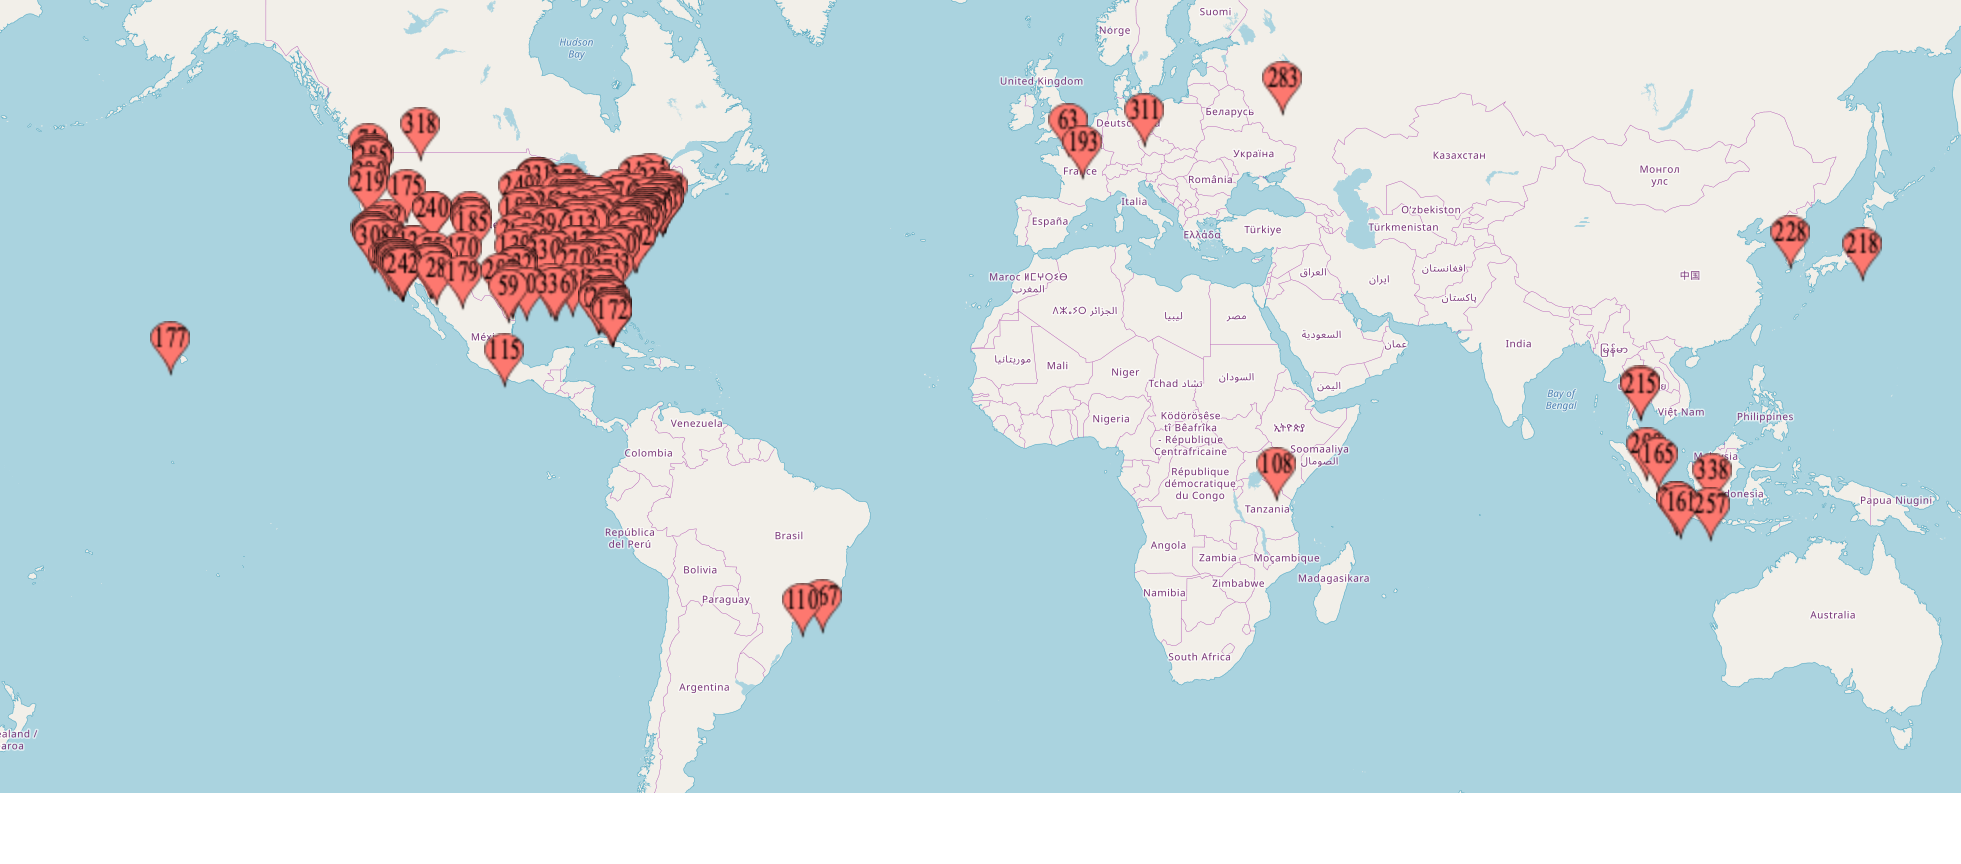

In [82]:
from IPython.display import Image
Image("Map.png")

### Офисы компаний

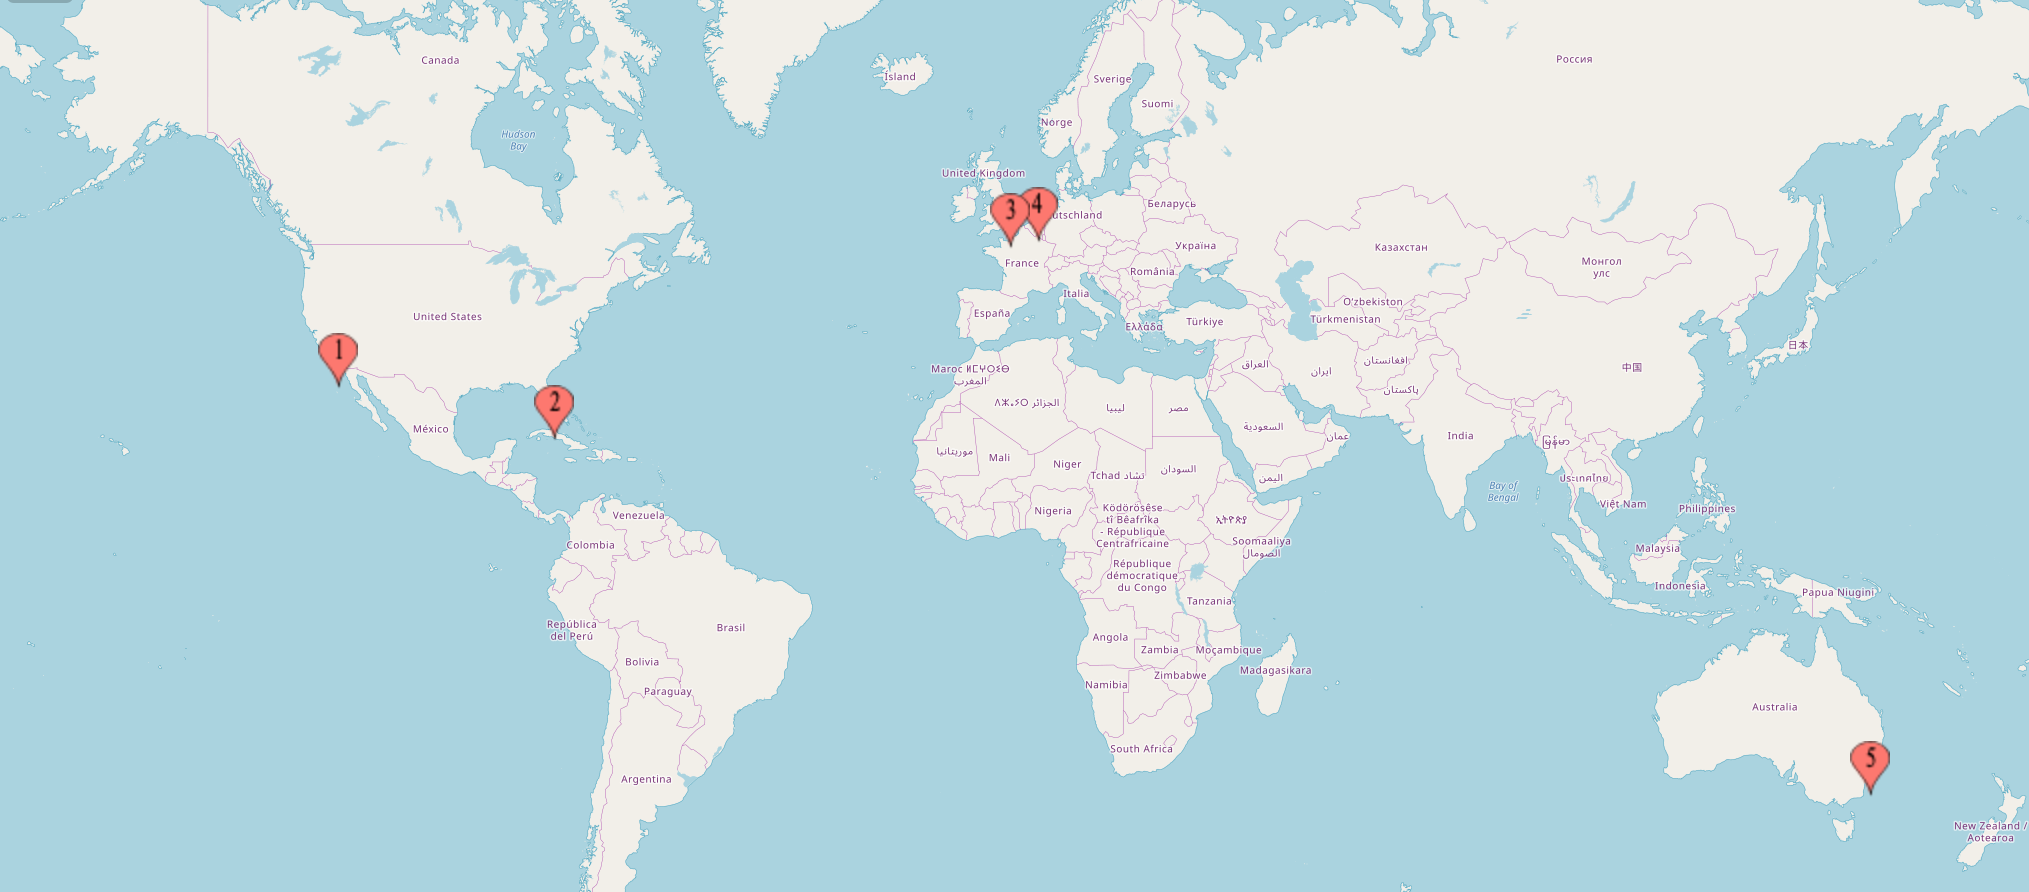

In [83]:
Image("Offices.png")

In [84]:
offices_matrix = np.array([[33.751277, -118.188740], 
                           [25.867736, -80.324116],
                          [51.503016, -0.075479],
                          [52.378894, 4.885084],
                          [39.366487, 117.036146],
                          [-33.868457, 151.205134]])
offices_matrix

array([[33.751277, -118.188740],
       [25.867736, -80.324116],
       [51.503016, -0.075479],
       [52.378894, 4.885084],
       [39.366487, 117.036146],
       [-33.868457, 151.205134]])

In [93]:
distance_list = []
for i in range(len(martix_coord)):
    for j in range(len(offices_matrix)):
        coords_1 = [martix_coord[i][0], martix_coord[i][1]]
        coords_2 = [offices_matrix[j][0], offices_matrix[j][1]]
        distance_list.append(geopy.distance.vincenty(coords_1, coords_2).km)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [94]:
distance_list

[3954.6491139603118,
 1748.1522822474556,
 5587.559694994573,
 5876.18848550725,
 11065.526821607935,
 15989.573004568689,
 575.0986313331807,
 3166.2350728754914,
 8500.254636525584,
 8704.662683190403,
 10497.168342164561,
 12545.624768930267,
 584.4135579840179,
 3156.9414466704234,
 8494.98179857725,
 8699.753502511086,
 10502.892162256405,
 12553.830612939628,
 2820.3596841967096,
 1898.3172981169814,
 6374.091609874025,
 6625.241219520147,
 10668.861369746797,
 14871.559070638346,
 580.1058620737083,
 4157.05707538463,
 8649.153800193175,
 8802.339396409423,
 9540.142585397572,
 11930.822783631787,
 3706.3888234045585,
 1475.912209710958,
 5918.846765050491,
 6206.764126797513,
 11221.26130069762,
 15708.655757232636,
 592.7002040443109,
 3148.4306384732517,
 8498.528329100198,
 8703.844634639758,
 10515.212842140603,
 12556.066127187232,
 3116.6354363680866,
 959.6238615652114,
 6788.160200609528,
 7074.250986185078,
 11612.995276571577,
 14944.522369644345,
 4188.265071402936,


In [95]:
sorted(distance_list)

[3.4758459456398736,
 7.473232758059828,
 13.989508525635182,
 18.446965858161107,
 19.965422193191486,
 20.083481829298062,
 20.972688719135647,
 24.61859140376059,
 28.50966431087388,
 30.052960808513976,
 30.781408060009504,
 31.753935186626823,
 32.558263281921384,
 34.733546602738585,
 37.60047882678091,
 39.11103588169049,
 41.985212446528166,
 42.35131596832094,
 42.674330653612834,
 44.36292379902391,
 45.4739518430387,
 49.751233064379434,
 58.78754124318878,
 58.931151891827916,
 59.66259254357244,
 59.727832693222034,
 60.270852495620716,
 73.3491131431577,
 74.64577821517261,
 76.6738868355837,
 78.33199272130604,
 95.64882855186846,
 97.02072749592334,
 99.16443306434793,
 117.0990783680355,
 120.55464557096944,
 134.10290904037905,
 139.181290316915,
 150.3679601224753,
 154.25665258342,
 157.5416139453426,
 231.71645877608822,
 245.0451808638417,
 289.3081121074258,
 289.5320358257903,
 296.738764706928,
 305.2268005143696,
 313.3537115732312,
 313.72378110740385,
 314.2

In [97]:
result = sorted(distance_list)[:21]
result

[3.4758459456398736,
 7.473232758059828,
 13.989508525635182,
 18.446965858161107,
 19.965422193191486,
 20.083481829298062,
 20.972688719135647,
 24.61859140376059,
 28.50966431087388,
 30.052960808513976,
 30.781408060009504,
 31.753935186626823,
 32.558263281921384,
 34.733546602738585,
 37.60047882678091,
 39.11103588169049,
 41.985212446528166,
 42.35131596832094,
 42.674330653612834,
 44.36292379902391,
 45.4739518430387]